# Introducción

El siguiente informa abarca estudios en torno a la educación primaria y secundaria en Chile, y tiene como principal objetivo caracterizar la relación entre el promedio general y distintas variables, como la condición de ruralidad, región geográfica, género, tipo de dependencia. Estas variables están presentes en el mismo dataset otorgado por el MINEDUC, que contiene gran información acerda de tres millones de estudiantes. Como es bien sabido, Chile es un país muy desigual y sumamente segregado en varios ámbitos. El objetivo de este proyecto es buscar patrones en los datos que puedan reflejar estas desigualdades.

El informe contiene análisis y síntesis de distintas observaciones en torno a los estudios y visualizaciones del comportamiento de estas variables.

# Exploración


In [1]:
#rendimiento_path = "http://datos.mineduc.cl/datasets/195065-rendimiento-escolar-ano-2020.download/"
rendimiento_path = "datos/mineduc/rendimiento_escolar/rendimiento2020.zip"

#puntajes_path = "http://datos.mineduc.cl/datasets/196340-prueba-de-transicion-universitaria-2021-inscritos-puntajes.download/"
puntajes_path = "datos/mineduc/PDT/puntajes2021.zip"

In [2]:
import pandas as pd
import numpy as np

# este link a veces se muere
rendimiento = pd.read_csv(rendimiento_path,
                          sep=";", decimal=",", compression = "zip",
                          dtype={
                              "NOM_RBD":"category",
                              "NOM_REG_RBD_A":"category",
                              "NOM_COM_RBD":"category",
                              "NOM_DEPROV_RBD":"category",
                              "LET_CUR":"category",
                              "GEN_ALU":"category",
                              "NOM_COM_ALU":"category",
                              "SIT_FIN":"category",
                              "SIT_FIN_R":"category",
                              "RURAL_RBD":"category",
                              "COD_DEPE":"category",
                              "COD_DEPE2":"category",
                              "ESTADO_ESTAB":"category",
                              "COD_ENSE":"category",
                              "COD_ENSE2":"category"},
                          converters={"EDAD_ALU": lambda s : int(s) if s != ' ' else 0})

In [3]:
# cambio de nombre para algunas categorias
rendimiento.GEN_ALU.cat.categories = ["HOMBRE", "MUJER", "S/I"]

rendimiento.RURAL_RBD.cat.categories = ["URBANO", "RURAL"]


rendimiento.COD_DEPE = rendimiento.COD_DEPE.cat.rename_categories(
    {"1":"CORP_MUNICIPAL", "2":"MUNICIPAL_DAEM", "3":"PARTICULAR_SUBVEN",
     "4":"PARTICULAR_PAGADO", "5":"CORP_ADMIN_DELEGD", "6":"SERVI_LOCAL_EDUCA"})
rendimiento.COD_DEPE2 = rendimiento.COD_DEPE2.cat.rename_categories(
    {"1":"Municipal", "2":"Particular subvencionado", "3":"Particular pagado", 
     "4":"Corp. admin. delegada", "5":"Serv. local educación"}
)

rendimiento.ESTADO_ESTAB = rendimiento.ESTADO_ESTAB.cat.rename_categories(
    {"1":"FUNCIONANDO","2":"RECESO", "3":"CERRADO"}
)

rendimiento.SIT_FIN = rendimiento.SIT_FIN.cat.rename_categories(
    {" ":"SIN_INFO", "P":"PROMOVIDO", "R":"REPROBADO", "Y":"RETIRADO"}
)

rendimiento.SIT_FIN_R = rendimiento.SIT_FIN_R.cat.rename_categories (
    {" ":"SIN_INFO", "P":"PROMOVIDO", "R":"REPROBADO", "Y":"RETIRADO", "T":"TRASLADADO"}
)

rendimiento.COD_ENSE2 = rendimiento.COD_ENSE2.cat.rename_categories(
    {"2":"Básica Niños", "3":"Básica Adultos", 
     "5":"Media HC Jóvenes", "6":"Media HC Adultos",
     "7":"Media TP Jóvenes", "8":"Media TP Adultos"}
)
pass

In [4]:
rendimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164534 entries, 0 to 3164533
Data columns (total 37 columns):
 #   Column          Dtype   
---  ------          -----   
 0   AGNO            int64   
 1   RBD             int64   
 2   DGV_RBD         int64   
 3   NOM_RBD         category
 4   COD_REG_RBD     int64   
 5   NOM_REG_RBD_A   category
 6   COD_PRO_RBD     int64   
 7   COD_COM_RBD     int64   
 8   NOM_COM_RBD     category
 9   COD_DEPROV_RBD  int64   
 10  NOM_DEPROV_RBD  category
 11  COD_DEPE        category
 12  COD_DEPE2       category
 13  RURAL_RBD       category
 14  ESTADO_ESTAB    category
 15  COD_ENSE        category
 16  COD_ENSE2       category
 17  COD_GRADO       int64   
 18  LET_CUR         category
 19  COD_JOR         int64   
 20  COD_TIP_CUR     int64   
 21  COD_DES_CUR     int64   
 22  MRUN            int64   
 23  GEN_ALU         category
 24  FEC_NAC_ALU     int64   
 25  EDAD_ALU        int64   
 26  COD_REG_ALU     int64   
 27  COD_COM_ALU 

El dataset abarca más de 3 millones de alumnos.

Si bien hay muchas columnas, los datos que estas proveen pueden ser agrupados en menos categorías:

- Identificación del alumno: edad, género, y lugar de residencia
- Rendimiento del alumno: curso, promedio general y porcentaje de asistencia
- Identificación del colegio: identificador único (RBD), ubicación, administración (municipal, particular subvencionado, etc.).
- Tipo de enseñanza: técnico-profesional, científico-humanista, para adultos, etc.

## Cobertura

In [5]:
print(f"Hay {len(rendimiento.COD_PRO_RBD.unique())} provincias, "
    + f"{len(rendimiento.COD_COM_RBD.unique())} comunas"
    + f" y {len(rendimiento.RBD.unique())} establecimientos distintos.")

Hay 56 provincias, 345 comunas y 9040 establecimientos distintos.


Chile tiene 56 provincias y 346 comunas, es decir, hay una sola comuna para la cual no hay ningún establecimiento en los datos. Todo el resto del territorio debiese estar representado.

De una [fuente externa](https://www.bcn.cl/siit/estadisticasterritoriales//resultados-consulta?id=82491) se obtiene que en Chile existen 11342 establecimientos educacionales, de los cuales 9040 están presentes en los datos. No está claro por qué estos establecimientos están ausentes, pero es probable que sean aquellos con menor cantidad de estudiantes. En general, el dataset parece ser bastante completo.

## Datos faltantes o incompletos

In [6]:
rendimiento.isna().describe()

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
count,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,...,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,...,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534,3164534


Aparentemente no existen datos faltantes, pero esto se debe a que los valores faltantes o incompletos están codificados de otro modo. Por ejemplo, la edad faltante se codifica con el valor 0.

In [7]:
# situacion final (aprobado, reprobado)
print(f"Sin info. de situación final: {(rendimiento.SIT_FIN_R == 'SIN_INFO').sum()}")

# genero
print(f"Sin género: {(rendimiento.GEN_ALU == 'S/I').sum()}")

# edad
print(f"Sin edad: {(rendimiento.EDAD_ALU == 0).sum()}")

# lugar de residencia
print(f"Sin lugar: {((rendimiento.COD_REG_ALU == 0) | (rendimiento.COD_COM_ALU == 0)).sum()}")

# alumnos retirados (promedio 0)
print(f"Sin promedio: {(rendimiento.PROM_GRAL == 0.0).sum()}")

Sin info. de situación final: 1197
Sin género: 5
Sin edad: 636
Sin lugar: 2
Sin promedio: 115617


En general hay pocos datos faltantes. La categoría más importante son los alumnos cuyo promedio fue ingresado como `0,0`. Todos estos datos pueden ser retirados del dataset.

In [8]:
rendimiento.drop(rendimiento[rendimiento.SIT_FIN_R == "SIN_INFO"].index, inplace = True)
rendimiento.drop(rendimiento[rendimiento.GEN_ALU == "S/I"].index, inplace = True)
rendimiento.drop(rendimiento[rendimiento.EDAD_ALU == 0].index, inplace = True)
rendimiento.drop(rendimiento[(rendimiento.COD_REG_ALU == 0) | (rendimiento.COD_COM_ALU == 0)].index, inplace = True)
rendimiento.drop(rendimiento[rendimiento.PROM_GRAL == 0.0].index, inplace = True)

## Distribución

### Región

<AxesSubplot:>

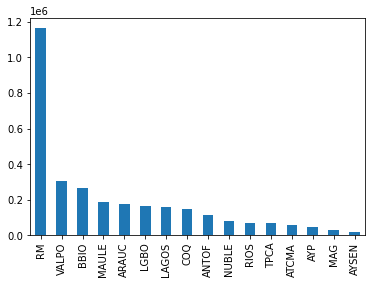

In [9]:
rendimiento["NOM_REG_RBD_A"].value_counts().plot(kind="bar")

Los alumnos se concentran en la región metropolitana. Las regiones de Valparaíso y Bio Bio son las que mayor cantidad de alumnos tienen sin contar la metropolitana, mientras que Aysen y Magallanes tienen la menor cantidad.

### Ruralidad

<AxesSubplot:ylabel='RURAL_RBD'>

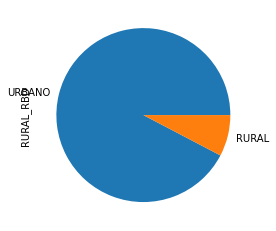

In [10]:
rendimiento.RURAL_RBD.value_counts().plot(kind="pie")

Así mismo,la mayoría (92%) de los estudiantes se encuentran en zonas urbanas.

### Tipo de establecimiento

<AxesSubplot:ylabel='COD_DEPE'>

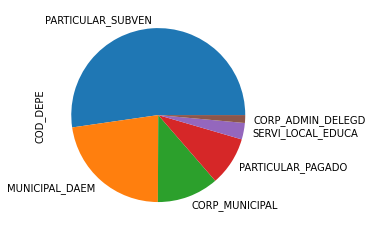

In [11]:
rendimiento.COD_DEPE.value_counts().plot(kind="pie")

Alrededor de la mitad de los estudiantes en Chile asiste a colegios particulares subvencionados. El servicio local de educación corresponde a un 3%, mientras que la corporación administración delegada corresponde al 1% del tipo de establecimientos del país.

<AxesSubplot:ylabel='COD_DEPE2'>

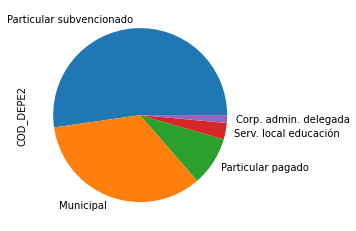

In [12]:
rendimiento.COD_DEPE2.value_counts().plot(kind="pie")

## Promedios
### Ruralidad

In [13]:
rendimiento.groupby("RURAL_RBD").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
RURAL_RBD,,,,,,,,
URBANO,2814218.0,6.000115,0.896840,1.0,5.5,6.2,6.7,7.0
RURAL,234122.0,5.945313,0.846167,1.0,5.4,6.1,6.6,7.0


No se observan diferencias de promedio significativas entre estudiantes rurales y urbanos.

### Dependencia

In [14]:
rendimiento.groupby("COD_DEPE2").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
COD_DEPE2,,,,,,,,
Particular subvencionado,1593539.0,6.033265,0.875713,1.0,5.6,6.2,6.7,7.0
Serv. local educación,93145.0,5.795030,0.963001,1.0,5.2,6.0,6.6,7.0
Municipal,1039401.0,5.844379,0.931466,1.0,5.3,6.0,6.6,7.0
Particular pagado,277847.0,6.494710,0.508951,1.0,6.3,6.6,6.9,7.0
Corp. admin. delegada,44408.0,5.502405,0.946931,1.0,5.0,5.6,6.2,7.0


### Género

In [15]:
rendimiento.groupby("GEN_ALU").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
GEN_ALU,,,,,,,,
HOMBRE,1561238.0,5.927001,0.925737,1.0,5.4,6.1,6.6,7.0
MUJER,1487102.0,6.068247,0.851671,1.0,5.6,6.3,6.7,7.0
S/I,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Región

In [16]:
rendimiento.groupby("NOM_REG_RBD_A").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
NOM_REG_RBD_A,,,,,,,,
AYP,44742.0,6.039770,0.880625,1.0,5.6,6.3,6.7,7.0
TPCA,67970.0,5.991477,0.891894,1.0,5.5,6.2,6.7,7.0
ANTOF,113031.0,5.961813,0.883237,1.0,5.4,6.2,6.7,7.0
ATCMA,56233.0,6.015763,0.850892,1.0,5.6,6.2,6.7,7.0
COQ,145082.0,5.983524,0.891424,1.0,5.5,6.2,6.7,7.0
VALPO,307095.0,6.000204,0.933599,1.0,5.5,6.2,6.7,7.0
LGBO,164308.0,5.933132,0.933789,1.0,5.4,6.1,6.7,7.0
MAULE,185731.0,6.004445,0.932554,1.0,5.5,6.2,6.7,7.0
NUBLE,81068.0,6.109844,0.794929,1.0,5.6,6.3,6.7,7.0


### Nivel de enseñanza

In [17]:
rendimiento.groupby("COD_ENSE2").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
COD_ENSE2,,,,,,,,
Básica Niños,2021634.0,6.110023,0.800784,1.0,5.7,6.3,6.8,7.0
Básica Adultos,16935.0,4.861140,1.441165,1.0,4.0,5.1,6.0,7.0
Media HC Jóvenes,661768.0,5.983947,0.840859,1.0,5.5,6.2,6.6,7.0
Media HC Adultos,99891.0,5.002931,1.468828,1.0,4.4,5.4,6.1,7.0
Media TP Jóvenes,240176.0,5.593820,0.931167,1.0,5.1,5.7,6.3,7.0
Media TP Adultos,7936.0,5.011794,1.391807,1.0,4.4,5.3,6.0,7.0


### Resumen

En general la distribución de las notas es bastante uniforme. Las notas en areas rurales son ligeramente inferiores a las areas urbanas. Por género, las mujeres tienen notas levemente superiores. Por región, sólo Magallanes parece tener una distribución notablemente diferente al resto, tendiendo a ser mejor. La edad de los alumnos también es similar por región, por lo que los promedios son comparables.

Un criterio que arroja diferencias claras es el tipo de establecimiento, donde se observa una jerarquía con los colegios particulares pagados arriba, los sobvencionados en medio y los municipales abajo. El otro criterio es el nivel de enseñanza: los códigos 3, 6 y 8, que corresponden a educación para adultos, tienen una varianza mucho mayor y un promedio más bajo que la educación para jóvenes. Además, dentro de la educación para jóvenes se ve que la enseñanza técnico profesional tienen promedios más bajos que la humanistico científica.

Puesto que los datos de adultos tienen tanta varianza, se puede repetir el análisis considerando únicamente a los jóvenes.

## Promedios (sólo niños y jóvenes)

In [18]:
rend_jovenes = rendimiento.drop(
    rendimiento[(rendimiento.COD_ENSE2 == "Básica Adultos") 
                | (rendimiento.COD_ENSE2 == "Media HC Adultos") 
                | (rendimiento.COD_ENSE2 == "Media TP Adultos")].index)

### Ruralidad

In [19]:
rend_jovenes.groupby("RURAL_RBD").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
RURAL_RBD,,,,,,,,
URBANO,2695002.0,6.045238,0.834677,1.0,5.6,6.2,6.7,7.0
RURAL,228576.0,5.966449,0.819363,1.0,5.5,6.1,6.6,7.0


### Dependencia

In [20]:
rend_jovenes.groupby("COD_DEPE2").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
COD_DEPE2,,,,,,,,
Particular subvencionado,1524616.0,6.083128,0.799770,1.0,5.6,6.3,6.7,7.0
Serv. local educación,88123.0,5.851146,0.893505,1.0,5.3,6.0,6.6,7.0
Municipal,990505.0,5.883703,0.885410,1.0,5.3,6.0,6.6,7.0
Particular pagado,275992.0,6.499144,0.503322,1.0,6.3,6.6,6.9,7.0
Corp. admin. delegada,44342.0,5.505219,0.941752,1.0,5.0,5.6,6.2,7.0


### Género

In [21]:
rend_jovenes.groupby("GEN_ALU").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
GEN_ALU,,,,,,,,
HOMBRE,1492881.0,5.977815,0.860580,1.0,5.5,6.2,6.7,7.0
MUJER,1430697.0,6.103004,0.799831,1.0,5.7,6.3,6.7,7.0
S/I,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Región

In [22]:
rend_jovenes.groupby("NOM_REG_RBD_A").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
NOM_REG_RBD_A,,,,,,,,
AYP,42486.0,6.097889,0.804721,1.0,5.6,6.3,6.7,7.0
TPCA,64496.0,6.037412,0.840969,1.0,5.5,6.2,6.7,7.0
ANTOF,109538.0,5.982981,0.861302,1.0,5.5,6.2,6.7,7.0
ATCMA,54640.0,6.042432,0.820283,1.0,5.6,6.2,6.7,7.0
COQ,137639.0,6.039041,0.805258,1.0,5.6,6.2,6.7,7.0
VALPO,290014.0,6.061988,0.842519,1.0,5.6,6.3,6.7,7.0
LGBO,157929.0,5.977555,0.876298,1.0,5.4,6.2,6.7,7.0
MAULE,179185.0,6.056323,0.854673,1.0,5.6,6.3,6.7,7.0
NUBLE,79149.0,6.132090,0.766390,1.0,5.7,6.3,6.8,7.0


### Tipo de enseñanza

In [23]:
rend_jovenes.COD_ENSE = rend_jovenes.COD_ENSE.cat.rename_categories(
    {"110":"Básica",
     "310":"Media HC",
     "410":"Media TP Comercial",
     "510":"Media TP Industrial",
     "610":"Media TP Técnica",
     "710":"Media TP Agrícola",
     "810":"Media TP Marítima",
     "910":"Media Artística"}
)
rend_jovenes.COD_ENSE = rend_jovenes.COD_ENSE.cat.remove_unused_categories()

rend_jovenes.groupby("COD_ENSE").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
COD_ENSE,,,,,,,,
Básica,2021634.0,6.110023,0.800784,1.0,5.7,6.3,6.8,7.0
Media HC,661768.0,5.983947,0.840859,1.0,5.5,6.2,6.6,7.0
Media TP Comercial,68856.0,5.624037,0.942173,1.0,5.1,5.8,6.3,7.0
Media TP Industrial,97001.0,5.535835,0.922091,1.0,5.0,5.6,6.2,7.0
Media TP Técnica,54061.0,5.676208,0.922826,1.0,5.2,5.8,6.3,7.0
Media TP Agrícola,16075.0,5.553667,0.933443,1.0,5.1,5.7,6.2,7.0
Media TP Marítima,3710.0,5.517466,0.982150,1.0,5.0,5.7,6.2,7.0
Media Artística,473.0,5.633404,0.693511,3.0,5.3,5.7,6.1,7.0


### Curso
#### Básica

In [24]:
rend_jovenes[rend_jovenes.COD_ENSE == "Básica"].groupby("COD_GRADO").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
COD_GRADO,,,,,,,,
1,243881.0,6.337846,0.862165,1.0,6.1,6.7,6.9,7.0
2,248618.0,6.343828,0.798739,1.0,6.1,6.7,6.9,7.0
3,255417.0,6.260551,0.775006,1.0,5.9,6.5,6.8,7.0
4,259472.0,6.211636,0.743410,1.0,5.9,6.4,6.8,7.0
5,259578.0,6.058206,0.755322,1.0,5.6,6.2,6.6,7.0
6,258728.0,5.973108,0.758433,1.0,5.5,6.1,6.6,7.0
7,253018.0,5.847941,0.770140,1.0,5.4,6.0,6.5,7.0
8,242922.0,5.849377,0.755202,1.0,5.4,6.0,6.4,7.0


#### Media

In [25]:
rend_jovenes[rend_jovenes.COD_ENSE != "Básica"].groupby("COD_GRADO").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
COD_GRADO,,,,,,,,
1,243768.0,5.717712,0.914601,1.0,5.2,5.9,6.4,7.0
2,230015.0,5.862517,0.843888,1.0,5.4,6.0,6.5,7.0
3,218933.0,5.887909,0.930695,1.0,5.4,6.1,6.6,7.0
4,209228.0,6.080288,0.790426,1.0,5.7,6.3,6.7,7.0


### Resumen

Como es de esperarse dado los jóvenes son la mayoría de los estudiantes, la tendencia general se mantienen, con la excepción en el caso de los promedios por región, donde las diferencias se hacen más evidentes. En los promedios por curso se observa que tiende a descender en los cursos superiores, pero en la media la tendencia es la inversa.

Este análisis no revela patrones demasiado evidentes. De todos modos, puesto que los colegios no necesariamente evalúan con el mismo estándar de notas, no está claro que tan comparables son las notas de alumnos que asisten a colegios distintos. En este sentido, podría ser útil hacer comparaciones entre alumnos del mismo colegio. Por ejemplo: comparar resultados de alumnos que estudian en la misma comuna donde viven con los de alumnos que estudian en colegios de otras comunas.


### Promedio según comuna de estudio

In [26]:
rend_jovenes["MISMA_COMUNA"] = rend_jovenes.COD_COM_RBD == rend_jovenes.COD_COM_ALU

rend_jovenes.groupby("MISMA_COMUNA").PROM_GRAL.describe()

,count,mean,std,min,25%,50%,75%,max
MISMA_COMUNA,,,,,,,,
False,708430.0,6.012299,0.848627,1.0,5.5,6.2,6.7,7.0
True,2215148.0,6.047643,0.828764,1.0,5.6,6.2,6.7,7.0


El promedio general de los alumnos que estudian en la comuna en la que viven y el de aquellos que no parece distribuirse del mismo modo.

# Preguntas y problemas

Al examinar el dataset se hace evidente que muchas variables no tienen el poder predictivo que se esperaba. Las diferencias más marcadas se dan en relación a la ubicación geográfica y el código de dependencia. Creemos que esto se debe a que los sistemas de evaluación utilizados por los colegios no están estandarizados mucho más allá de la escala de notas y los contenidos a pasar. Hay una multiplicidad de variables que afectan la forma en que los colegios evalúan a sus alumnos, por lo que las notas son poco comparables entre alumnos de colegios distintos. En consecuencia, es evidente que es necesario añadir datos que sean comparables entre colegios, o bien, derivar tales variables a partir de los atributos ya existentes. Por ejemplo, se puede considerar la distribución de notas de los colegios y tomar en cuenta la posición del alumno en relación a sus compañeros. 

Es necesario, entonces, buscar relaciones más complejas entre las variables. Al comparar promedios una variable a la vez se hace difícil observar tendencias. Por tanto, nos interesa utilizar algoritmos de clustering para determinar si existen combinaciones de variables que generen grupos de alumnos con rendimiento escolar similar. En general, del análisis de datos como los resultados de la PSU se observa que en Chile existe esta segregación, y nos interesa determinar si es posible identificarlos con los datos disponibles en este dataset.

Para poder formular preguntas más interesantes, utilizaremos [datos de la prueba de transición](http://datos.mineduc.cl/dashboards/21331/descarga-bases-de-datos-de-prueba-de-transicion-universitaria-2021/) para obtener una métrica comparable entre alumnos de colegios distintos. Además de los puntajes obtenidos por los alumnos, se encuentra también disponible información sobre sus postulaciones y matrícula. Puesto que todos estos datos están indexados de acuerdo a la máscara del RUN debería ser posible consolidarlos en una única base de datos con varios atributos.

En esencia, nuestro objetivo sigue siendo el mismo: encontrar agrupaciones en los datos que puedan ser indicativas de segregación.

## Exploración Inicial del nuevo dataset

### Preprocesamiento de los datos

El dataset puntajes fue preprocesado en R para eliminar las entradas con datos inexistentes, los puntajes menores a 150 para las pruebas de matemática y lenguaje (esto representa los inscritos que no rindieron dichas evaluaciones). 

### Exploración

La siguiente exploración resumirá las principales observaciones iniciales del dataset que contiene los resultados de los inscritos en la PTU 2021.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ws = "/Users/catalaxis/Documents/Minerai de datos/proyecto2/"

# puntajes PTU

puntajes = pd.read_csv(puntajes_path, sep=";", decimal=",", na_values=" ", low_memory=False, compression="zip")
#puntajes = puntajes.drop('Unnamed: 0', 1) #se elimina vector que repite las posiciones

puntajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276059 entries, 0 to 276058
Data columns (total 72 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MRUN                     276059 non-null  int64  
 1   ANYO_PROCESO             276059 non-null  int64  
 2   COD_SEXO                 276059 non-null  int64  
 3   FECHA_NACIMIENTO         276056 non-null  float64
 4   RBD                      272772 non-null  float64
 5   CODIGO_ENS               272772 non-null  float64
 6   LOCAL_EDUCACIONAL        272772 non-null  float64
 7   UNIDAD_EDUCATIVA         272772 non-null  float64
 8   NOMBRE_UNIDAD_EDUC       272772 non-null  object 
 9   RAMA_EDUCACIONAL         272772 non-null  object 
 10  DEPENDENCIA              272772 non-null  float64
 11  CODIGO_REGION_EGRESO     276059 non-null  int64  
 12  NOMBRE_REGION_EGRESO     272772 non-null  object 
 13  CODIGO_PROVINCIA_EGRESO  272772 non-null  float64
 14  NOMB

El dataset abarca la información de más de 220mil inscritos que rindieron la PTU 2021.
Este dataset principalmente provee:

- Rut e información asociada a cada estudiante (género, edad).
- Rendimiento durante la enseñanza media y en las pruebas que haya rendido actualmente (2021) y anteriormente.
- Variables geográficas.
- Dependencia del establecimiento de egreso (esta variable nos indica de qué forma es administrado el establecimiento).
- Tipo de enseñanza del establecimiento de egreso.

<AxesSubplot:>

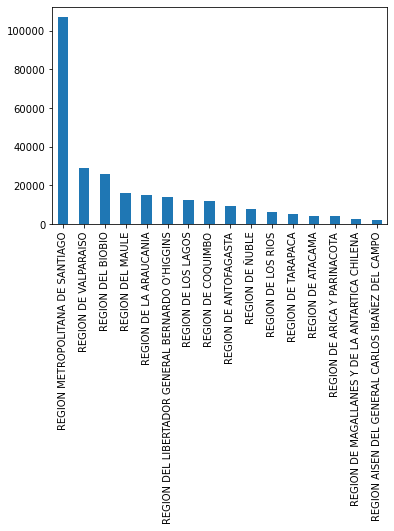

In [28]:
puntajes["NOMBRE_REGION_EGRESO"].value_counts().plot(kind="bar")

Asimismo se observó en la exploración de los datos de los estudiantes. No es sorpresa, pero se considera importante dejar evidencia de esto.

<AxesSubplot:>

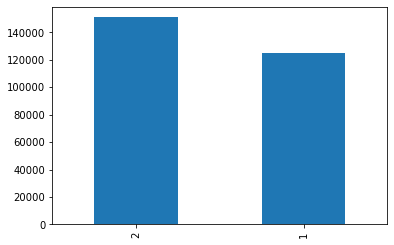

In [29]:
puntajes["COD_SEXO"].value_counts().plot(kind="bar")

Se observa que las inscritas superan a los inscritos en esta oportunidad.

<AxesSubplot:>

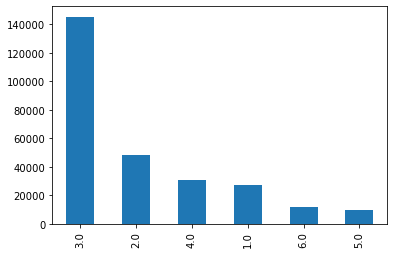

In [30]:
puntajes["DEPENDENCIA"].value_counts().plot(kind="bar")

La mayoría de los inscritos egresó de colegios particulares subvencionados (3), la segunda gran mayoría de municipales (1 y 2). En contraste los inscritos que egrasaron de colegios particulares pagados representan una minoría.

A continuación se separarán los resultados según la dependencia del establecimiento, posteriormente se explorarán las brechas y diferencias entre el rendimiento de los inscritos egresados.

In [31]:
puntajesMUNI = puntajes.drop(
    puntajes[(puntajes.DEPENDENCIA >= 3)].index)
puntajesSUB = puntajes.drop(
    puntajes[(puntajes.DEPENDENCIA != 3)].index)
puntajesPRIV = puntajes.drop(
    puntajes[(puntajes.DEPENDENCIA != 4)].index)

Text(0.5, 0.98, 'Distribución de puntajes compresión lectora')

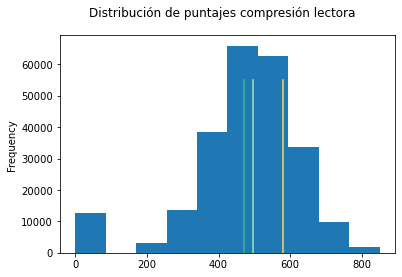

In [32]:
hist_CL = puntajes["CLEC_ACTUAL"].plot(kind="hist")
x = np.linspace(0,900,50)*0
y = np.linspace(0,55000,50)
muni_med = puntajesMUNI["CLEC_ACTUAL"].median()
sub_med = puntajesSUB["CLEC_ACTUAL"].median()
priv_med = puntajesPRIV["CLEC_ACTUAL"].median()
plt.plot(x + muni_med,y,color = "#3AB795")
plt.plot(x + sub_med,y,color = "#A0E8AF")
plt.plot(x + priv_med,y,color = "#FFCF56")
plt.suptitle("Distribución de puntajes compresión lectora")

Text(0.5, 0.98, 'Distribución de puntajes matemáticas')

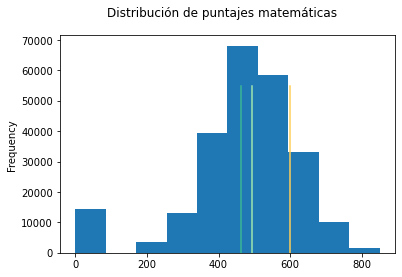

In [33]:
hist_CL = puntajes["MATE_ACTUAL"].plot(kind="hist")
x = np.linspace(0,900,50)*0
y = np.linspace(0,55000,50)
muni_med = puntajesMUNI["MATE_ACTUAL"].median()
sub_med = puntajesSUB["MATE_ACTUAL"].median()
priv_med = puntajesPRIV["MATE_ACTUAL"].median()
plt.plot(x + muni_med,y,color = "#3AB795")
plt.plot(x + sub_med,y,color = "#A0E8AF")
plt.plot(x + priv_med,y,color = "#FFCF56")
plt.suptitle("Distribución de puntajes matemáticas")

Como se puede apreciar, existe un importante desplazamiento de la mediana del puntaje obtenido en las pruebas de lenguaje y matemática de los inscritos egresados de establecimientos particulares (maiz), con respecto a los egresados de municipales (menta) y subvencionados (celadon). 

Para postular a una universidad adscrita al CRUCH es requisito poseer un puntaje promedio entre las pruebas de lenguaje y matemáticas superior a 475. Una observación intersante es mostrar cuál es la proporción según el tipo de establecimiento que no cumple con el requisito anterior:

In [34]:
puntajes475MUNI = puntajesMUNI.drop(
    puntajesMUNI[(puntajesMUNI.PROM_CM_ACTUAL > 475)].index)
puntajes475SUB = puntajesSUB.drop(
    puntajesSUB[(puntajesSUB.PROM_CM_ACTUAL > 475)].index)
puntajes475PRIV = puntajesPRIV.drop(
    puntajesPRIV[(puntajesPRIV.PROM_CM_ACTUAL > 475)].index)
print("Para municipales: " + str(len(puntajes475MUNI)/len(puntajesMUNI)))
print("Para subvencionados: " + str(len(puntajes475SUB)/len(puntajesSUB)))
print("Para privados: " + str(len(puntajes475PRIV)/len(puntajesPRIV)))

Para municipales: 0.6348128498356328
Para subvencionados: 0.5058699661427509
Para privados: 0.21416123410572516


Las observaciones anteriores evidencian la fuerte relación entre el rendimiento en la PTU y el tipo de establecimiento de egreso de los inscritos. 

<AxesSubplot:xlabel='CODIGO_REGION_EGRESO', ylabel='PROM_CM_ACTUAL'>

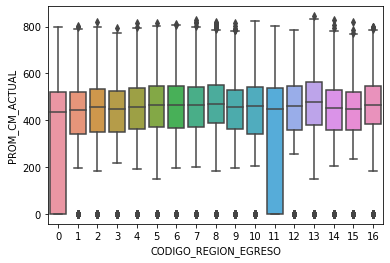

In [35]:
import seaborn as sns
sns.boxplot(x="CODIGO_REGION_EGRESO", y="PROM_CM_ACTUAL", data=puntajes)

Existe una relación pequeña entre el rendimiento promedio de los inscritos en las pruebas de matemáticas y lenguaje y su región de egreso (una de las variables geográficas). 

### Resumen

El nuevo dataset proporciona información vital para el análisis, de los que sí se deduce que existen variables determinantes para el rendimiento de los estudiantes, como es el caso de la dependencia del establecimiento.

# Propuesta experimental

## Consolidación del dataset

Del dataset de rendimiento académico se tomará:
- Colegio
- Dependencia del colegio (municipal, subvencionado, etc.)
- Región y comuna del colegio
- Ruralidad del colegio (si/no)
- Región y comuna de residencia del alumno
- Género del alumno

Del dataset de puntajes de la prueba de transición:
- Promedio notas de enseñanza media del alumno
- Puntaje lenguaje, matemáticas y pruebas específicas

Adicionalmente, se incorpora la ubicación (coordenadas geográficas) de las comunas.

### Propuesta Clasificación
- Se seleccionan los siguientes atributos del dataset: 
    'RBD',
    'RAMA_EDUCACIONAL',
    'DEPENDENCIA',
    'NOMBRE_COMUNA_EGRESO',
    'PTJE_NEM',
    'PORC_SUP_NOTAS',
    'PTJE_RANKING',
    'CLEC_ACTUAL',
    'MATE_ACTUAL',
    'HCSO_ACTUAL',
    'CIEN_ACTUAL',
    'CORRECTAS_CL',
    'ERRADAS_CL',
    'OMITIDAS_CL',
    'CORRECTAS_MATE',
    'ERRADAS_MATE',
    'OMITIDAS_MATE',
    'CORRECTAS_HCS',
    'ERRADAS_HCS',
    'OMITIDAS_HCS',
    'CIENCIA_CORRECTAS',
    'CIENCIA_ERRADAS',
    'CIENCIA_OMITIDAS'
- Los atributos NOMBRE_COMUNA_EGRESO y RAMA_EDUCACIONAL corresponden a strings, generamos un entero que codifique cada valor único
- No consideramos relevante la mención para quienes rinden la prueba de ciencias sino la cantidad de respuestas correctas, por las cuales se agregan de la siguiente forma:
    CIENCIA_CORRECTAS = CORRECTAS_CFIS + CORRECTAS_CQUI + CORRECTAS_CBIO
- Se agregar la nueva columna creadas al dataset
- Separar el dataset en dos, uno para quienes dan la prueba de ciencia, otro para quienes dan la prueba de historia y ciencias sociales, filtrando según HSCO_ACTUAL=0 y CIEN_ACTUAL=0 para obtener los dataset ciencia e historia respectivamente
- Para “ciencias” se agrega la nueva columna CORRECTAS_TOTAL que es CORRECTAS_MATE + CORRECTAS_CL + CIENCIA_CORRECTAS
- Para “historia” se agrega la nueva columna CORRECTAS_TOTAL que es CORRECTAS_MATE + CORRECTAS_CL + CIENCIA_HCS
- Para dataset “ciencia” nos quedamos solo con las columnas RBD, RAMA_EDUCACIONAL, DEPENDENCIA, NOMBRE_COMUNA_EGRESO, CORRECTAS_TOTAL
- Para dataset “historia” nos quedamos solo con las columnas RBD, RAMA_EDUCACIONAL, DEPENDENCIA, NOMBRE_COMUNA_EGRESO, CORRECTAS_TOTAL
- El vector “y” de clases corresponde a la columna CORRECTAS_TOTAL. Se tienen dos vectores de clases, uno para ciencia “yc”, otro para historia “yh”
- El dataframe “X” de atributos corresponde a las columnas RBD, RAMA_EDUCACIONAL, DEPENDENCIA, NOMBRE_COMUNA_EGRESO de los respectivos datasets. Se tiene uno para ciencia “Xc”, otro para historia “Xh”
- Ahora queda decidir cómo se va a conformar el training set y el test set, lo hacemos de dos formas
    1)	70% training set, 30% test set 
    2)	Cross validation
- Se utilizan los siguientes clasificadores: Decision Tree, Support Vector Classifier, KNN
- Respecto a la elección de parámetros para los clasificadores, utilizamos Grid search
- Se procede a comparar el rendimiento de cada modelo entrenado, mediante comparación de métricas precision, recall, f1-score y accuracy
- Se escoge el modelo con mejores métricas 


### Clustering

- Se seleccionan los siguientes atributos:
    - Ubicación del colegio de egreso
    - Ubicación residencia del alumno
    - Promedio de notas de enseñanza media
    - Puntaje PDT
- Se quitan los datos que presenten puntaje 0.0 en la prueba de matemáticas o la de lenguaje.
- Se normalizan estos atributos al rango (0, 1).
- Se generan dos sub-conjuntos: quienes dieron la prueba de ciencias, y quienes dieron la de historia. Nótese que estos conjuntos no son disjuntos (hay gente que dio las dos pruebas).

Para el clustering con k-Means:
- Se utiliza el método del codo para estimar `k`.
- Se generan dos clusterings (historia y ciencias).
- Se grafica y evalúa visualmente el resultado. Si es necesario, se pueden aplicar otros métodos de evaluación de clusters.

#### Variantes
- Se puede aplicar otros algoritmos de clustering (i.e. DBSCAN).
- Se puede usar otro subconjunto de los atributos.

## Implementación

### Consolidación de datos

In [36]:
# puntajes PTU
#puntajes = pd.read_csv("datos/mineduc/PDT/puntajes_2021.csv", sep=";", decimal=",", low_memory=False, na_values=" ")


In [37]:
datos = pd.merge(
    rendimiento[["MRUN", "COD_COM_RBD", "RURAL_RBD", "COD_COM_ALU", "GEN_ALU", "COD_DEPE", "COD_DEPE2"]],
    puntajes[["MRUN", "PROMEDIO_NOTAS", "CLEC_ACTUAL","MATE_ACTUAL", "HCSO_ACTUAL", "CIEN_ACTUAL"]]
)

In [38]:
# posicion (latitud, longitud) comuna
#pos_com = pd.read_json("coord.json", dtype={"name":"category"})
pos_com = pd.read_json("https://raw.githubusercontent.com/zerujio/proyecto-cc5206/main/coord.json",
                       dtype={"name":"category"})

# codigo de comuna
#cod_com = pd.read_csv("CUT_2018_v04.csv", sep=";", decimal=",")
cod_com = pd.read_csv("https://raw.githubusercontent.com/zerujio/proyecto-cc5206/main/CUT_2018_v04.csv", 
                      sep=";", decimal=",")
cod_com = cod_com.rename(columns={"Nombre Comuna":"nombre_comuna", 
                                  "Código Comuna 2018":"codigo_comuna"})

# merge
comunas = pd.merge(pos_com, cod_com, left_on="name", right_on="nombre_comuna")

In [39]:
datos_RBD = pd.merge(datos, 
                     comunas[["lng", "lat", "nombre_comuna", "codigo_comuna"]],
                     "left", left_on="COD_COM_RBD", right_on="codigo_comuna")
datos_RBD = datos_RBD.rename(
    columns={"lng":"lng_col", "lat":"lat_col", 
             "codigo_comuna":"cod_com_col", "nombre_comuna":"nom_com_col"})

In [40]:
datos_col_alu = pd.merge(datos_RBD,
                         comunas[["lng", "lat", "codigo_comuna", "nombre_comuna"]],
                         "left", left_on="COD_COM_ALU", right_on="codigo_comuna")
datos_col_alu = datos_col_alu.rename(
    columns={"lng":"lng_alu", "lat":"lat_alu", 
             "codigo_comuna":"cod_com_alu", "nombre_comuna":"nom_com_alu"})

In [41]:
datos_col_alu = datos_col_alu.drop(columns=["cod_com_alu", "cod_com_col"])
datos_col_alu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191165 entries, 0 to 191164
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   MRUN            191165 non-null  int64   
 1   COD_COM_RBD     191165 non-null  int64   
 2   RURAL_RBD       191165 non-null  category
 3   COD_COM_ALU     191165 non-null  int64   
 4   GEN_ALU         191165 non-null  category
 5   COD_DEPE        191165 non-null  category
 6   COD_DEPE2       191165 non-null  category
 7   PROMEDIO_NOTAS  189465 non-null  float64 
 8   CLEC_ACTUAL     166025 non-null  float64 
 9   MATE_ACTUAL     166025 non-null  float64 
 10  HCSO_ACTUAL     166025 non-null  float64 
 11  CIEN_ACTUAL     166025 non-null  float64 
 12  lng_col         191165 non-null  float64 
 13  lat_col         191165 non-null  float64 
 14  nom_com_col     191165 non-null  object  
 15  lng_alu         191165 non-null  float64 
 16  lat_alu         191165 non-null  float

### Clustering con K-means
#### Normalización de datos

In [42]:
datos_col_alu = datos_col_alu.dropna()

norm = pd.DataFrame()

# NEM
norm["prom_notas"] = (datos_col_alu.PROMEDIO_NOTAS - 4.0) / 3.0

# Puntajes PTU
def ptje_norm(serie):
    return (serie - 150) / 700

norm["ptje_leng"] = ptje_norm(datos_col_alu.CLEC_ACTUAL)
norm["ptje_mate"] = ptje_norm(datos_col_alu.MATE_ACTUAL)
norm["ptje_hist"] = ptje_norm(datos_col_alu.HCSO_ACTUAL)
norm["ptje_cien"] = ptje_norm(datos_col_alu.CIEN_ACTUAL)

# ubicación
# Las coordenadas geográficas se normalizan en un cuadrado de 45° de lado 
# (un poco más que el largo de Chile)
min_lat = -60.0
max_lat = -15.0
min_lng = -75.0 - 17.5
max_lng = -65.0 + 17.5

def lat_norm(serie):
    return (serie - min_lat) / (max_lat - min_lat)

def lng_norm(serie):
    return (serie - min_lng) / (max_lng - min_lng)

norm["lat_alu"] = lat_norm(datos_col_alu.lat_alu)
norm["lng_alu"] = lng_norm(datos_col_alu.lng_alu)
norm["lat_col"] = lat_norm(datos_col_alu.lat_col)
norm["lng_col"] = lng_norm(datos_col_alu.lng_col)

#### K-Means

In [43]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [44]:
basic = ["prom_notas", "ptje_leng", "ptje_mate", "lng_col", "lat_col", "lng_alu", "lat_alu"]
cien = basic + ["ptje_cien"]
hcso = basic + ["ptje_hist"]

km_data = norm.drop(norm[(norm.ptje_mate < 0.0) | (norm.ptje_leng < 0.0)].index)

cien_data = km_data[km_data.ptje_cien >= 0.0]
hcso_data = km_data[km_data.ptje_hist >= 0.0]

Elección de número de clusters:

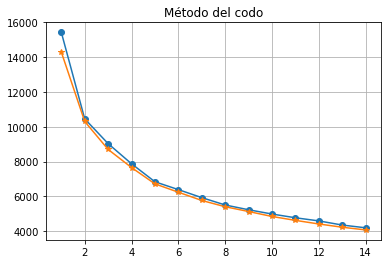

In [45]:
cien_sse = []
hcso_sse = []

clusters = list(range(1, 15))
for k in clusters:
    km_cien = KMeans(n_clusters=k).fit(cien_data[cien])
    km_hcso = KMeans(n_clusters=k).fit(hcso_data[hcso])
    cien_sse.append(km_cien.inertia_)
    hcso_sse.append(km_hcso.inertia_)

plt.plot(clusters, cien_sse, marker="o")
plt.plot(clusters, hcso_sse, marker="*")

plt.title("Método del codo")
plt.grid(True)

plt.show()

Se eligen __6__ clusters utilizando el método del codo.

In [46]:
km_cien = KMeans(n_clusters=6).fit(cien_data[cien])
km_hcso = KMeans(n_clusters=6).fit(hcso_data[hcso])

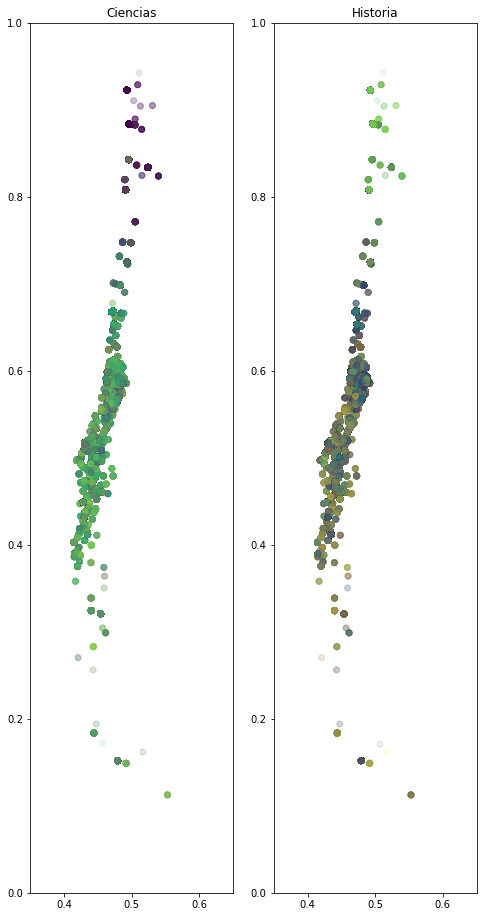

In [47]:
fig = plt.figure(figsize=(8, 16))

grid = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(grid[0, 0])
ax1.scatter(cien_data.lng_alu, cien_data.lat_alu, c=km_cien.labels_, alpha=0.1)
ax1.set_ylim((0, 1))
ax1.set_xlim((0.35, 0.65))
ax1.set_title("Ciencias")

ax2 = fig.add_subplot(grid[0, 1])
ax2.scatter(hcso_data.lng_alu, hcso_data.lat_alu, c=km_hcso.labels_, alpha=0.1)
ax2.set_ylim((0, 1))
ax2.set_xlim((0.35, 0.65))
ax2.set_title("Historia")

plt.show()

Visualmente, no se aprecia una tendencia geográfica clara en el clustering. La excepción es el extremo norte del país, que parece estar agrupado en un solo cluster.

In [48]:
from sklearn.decomposition import PCA

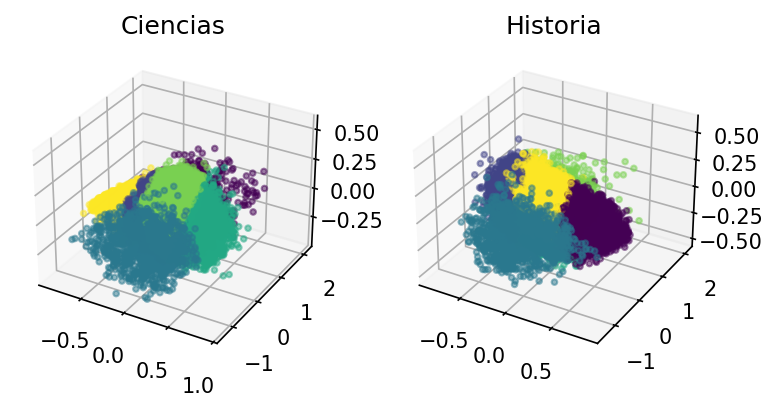

In [49]:
pca_cien = pd.DataFrame(PCA(n_components=3).fit_transform(cien_data[cien]))
pca_hcso = pd.DataFrame(PCA(n_components=3).fit_transform(hcso_data[hcso]))

fig = plt.figure(dpi = 150)
grid = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(grid[0, 0], projection="3d")
ax1.scatter(pca_cien[0], pca_cien[1], pca_cien[2], c=km_cien.labels_, s=7, alpha=0.5)
ax1.set_title("Ciencias")

ax2 = fig.add_subplot(grid[0, 1], projection="3d")
ax2.scatter(pca_hcso[0], pca_hcso[1], pca_hcso[2], c=km_hcso.labels_, s=7, alpha=0.5)
ax2.set_title("Historia")

plt.show()

Aparentemente, no existen clusters bien demarcados en los datos. Al aplicar PCA y graficar en tres dimensiones no se observa una separación entre los clusters generados, esto es, la distribución de los puntajes muestra cierta continuidad.

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
print("Silhoutte score")
print(f"Ciencias: {silhouette_score(cien_data[cien], km_cien.labels_)}")
print(f"HCSO: {silhouette_score(hcso_data[hcso], km_hcso.labels_)}")

Silhoutte score
Ciencias: 0.1918219702368427
HCSO: 0.20790155990075868


El coeficiente de silhoutte calculado es bastante bajo, lo que corrobora lo deducido de la visualización anterior.

#### Otros conjuntos de atributos

Se puede repetir el procedimiento utilizando sólo puntajes y promedio:

In [52]:
atrib_cien = ["prom_notas", "ptje_leng", "ptje_mate", "ptje_cien"]
atrib_hist = ["prom_notas", "ptje_leng", "ptje_mate", "ptje_hist"]
km_ptje_cien = KMeans(n_clusters = 6).fit(cien_data[atrib_cien])
km_ptje_hist = KMeans(n_clusters = 6).fit(hcso_data[atrib_hist])
pca_cien = pd.DataFrame(PCA(n_components=2).fit_transform(cien_data[atrib_cien]))
pca_hist = pd.DataFrame(PCA(n_components=2).fit_transform(hcso_data[atrib_hist]))

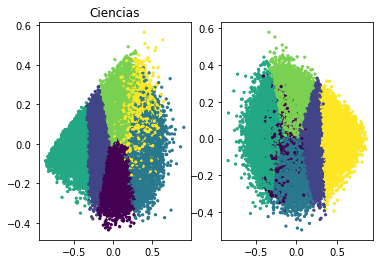

In [53]:
fig = plt.figure()
grid = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(grid[0, 0])
ax1.scatter(pca_cien[0], pca_cien[1], c=km_ptje_cien.labels_, s=5)
ax1.set_title("Ciencias")

ax2 = fig.add_subplot(grid[0, 1])
ax2.scatter(pca_hist[0], pca_hist[1], c=km_ptje_hist.labels_, s=5)

... pero el resultado es similar. Los datos no tienen una distribución uniforme, pero tampoco están separados. En vista de esto, no parece razonable seguir intentando métodos de clustering.

### Clasificación

El objetivo en esta sección es intentar predecir algún atributo en base a otros. 

#### COD_DEPE

El atributo a predecir es el código de dependencia.

In [61]:
# conjunto de datos para clasificacion
datos_clf = datos_col_alu.drop(datos_col_alu[(datos_col_alu.CLEC_ACTUAL < 150.0)
                                             | (datos_col_alu.MATE_ACTUAL < 150.0)].index)

datos_clf["RURAL_RBD_CODES"] = datos_clf.RURAL_RBD.cat.codes
datos_clf["GEN_ALU_CODES"] = datos_clf.GEN_ALU.cat.codes

datos_clf_cien = datos_clf.drop(datos_clf[datos_clf.CIEN_ACTUAL >= 150.0].index)
datos_clf_hist = datos_clf.drop(datos_clf[datos_clf.HCSO_ACTUAL >= 150.0].index)

atrib_ptje_base = ["CLEC_ACTUAL", "MATE_ACTUAL"]
atrib_ptje_cien = ["CIEN_ACTUAL"]
atrib_ptje_hist = ["HCSO_ACTUAL"]
atrib_coord_colegio = ["lng_col", "lat_col"]
atrib_coord_alumno = ["lng_alu", "lat_alu"]

##### Evaluación de clasificadores

En esta sección se evalúan los distintos clasificadores para elegir uno con el que hacer el resto de las pruebas.

In [68]:
from sklearn.model_selection import cross_validate

def mean_score(results, key):
    return np.mean(results[key])

def eval_classifier(clf, X, y):
    scoring = ["precision_weighted", "recall_weighted", "accuracy", "f1_weighted"]
    
    cv_results = cross_validate(clf, X, y, scoring = scoring, return_train_score=True, n_jobs=-1)
    
    print(f"Precision : {mean_score(cv_results, 'test_precision_weighted')}")
    print(f"Recall    : {mean_score(cv_results, 'test_recall_weighted')}")
    print(f"Accuracy  : {mean_score(cv_results, 'test_accuracy')}")
    print(f"f1        : {mean_score(cv_results, 'test_f1_weighted')}")
    print(f"Fit time  : {mean_score(cv_results, 'fit_time')}")

In [69]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

for clf in [("Dummy", DummyClassifier(strategy="stratified")), 
          ("DecisionTree", DecisionTreeClassifier()),
          ("Gaussian Naive Bayes", GaussianNB()),
          ("K Nearest Neighbors", KNeighborsClassifier()),
          ("Support Vector", SVC())]:
    
    print(f"Clasificador: {clf[0]}")
    print("[Ciencias]")
    eval_classifier(clf[1], datos_clf_cien[atrib_ptje_base + atrib_ptje_cien], datos_clf_cien.COD_DEPE2)
    
    print("[Historia]")
    eval_classifier(clf[1], datos_clf_hist[atrib_ptje_base + atrib_ptje_hist], datos_clf_hist.COD_DEPE2)
    print("------------")
    print()

Clasificador: Dummy
[Ciencias]
Precision : 0.3738109699207346
Recall    : 0.3738598513120051
Accuracy  : 0.3738598513120051
f1        : 0.3738284090080542
Fit time  : 0.025393104553222655
[Historia]
Precision : 0.3936550418910243
Recall    : 0.3929354986009409
Accuracy  : 0.3929354986009409
f1        : 0.39327573509801084
Fit time  : 0.019375705718994142
------------

Clasificador: DecisionTree
[Ciencias]
Precision : 0.46032254416936846
Recall    : 0.5231208440530917
Accuracy  : 0.5231208440530917
f1        : 0.4578541927214143
Fit time  : 0.08461856842041016
[Historia]
Precision : 0.4683831670532722
Recall    : 0.5459898748774912
Accuracy  : 0.5459898748774912
f1        : 0.4755865561506839
Fit time  : 0.09180078506469727
------------

Clasificador: Gaussian Naive Bayes
[Ciencias]


/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib

Precision : 0.4826053250268112
Recall    : 0.5383244895757744
Accuracy  : 0.5383244895757744
f1        : 0.4614595148937318
Fit time  : 0.05557851791381836
[Historia]


/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib

Precision : 0.4969538594392476
Recall    : 0.5571095620641615
Accuracy  : 0.5571095620641615
f1        : 0.47792874993955037
Fit time  : 0.043309354782104494
------------

Clasificador: K Nearest Neighbors
[Ciencias]
Precision : 0.43713822299128113
Recall    : 0.4589664641256646
Accuracy  : 0.4589664641256646
f1        : 0.44498125738251026
Fit time  : 0.05555987358093262
[Historia]


/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision : 0.4520122870181648
Recall    : 0.4810194722580724
Accuracy  : 0.4810194722580724
f1        : 0.4646984917724077
Fit time  : 0.08009405136108398
------------

Clasificador: Support Vector
[Ciencias]


/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib

Precision : 0.3769045738733507
Recall    : 0.5406009782123817
Accuracy  : 0.5406009782123817
f1        : 0.4063708206583403
Fit time  : 113.3253725528717
[Historia]


/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sergio/anaconda3/envs/datos/lib

Precision : 0.40585975571381033
Recall    : 0.5708368864618979
Accuracy  : 0.5708368864618979
f1        : 0.441928497013904
Fit time  : 96.77533392906189
------------



---
##### Decision Tree

In [56]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5653284524719417
                          precision    recall  f1-score   support

   Corp. admin. delegada       0.23      0.24      0.24      1647
               Municipal       0.49      0.49      0.49     14002
       Particular pagado       0.50      0.52      0.51      6176
Particular subvencionado       0.66      0.64      0.65     26717
   Serv. local educación       0.43      0.43      0.43      1176

                accuracy                           0.57     49718
               macro avg       0.46      0.46      0.46     49718
            weighted avg       0.57      0.57      0.57     49718



###### Cross validation

El valor ideal para el número de folds suele variar entre 5 y 10, recorremos estos valores y nos quedamos con aquel que genere el mejor rendimiento

In [57]:
from sklearn.model_selection import cross_validate



for i in [5, 7, 10]:
    print(f"Resultados para {i} folds")
    scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
    
    X = datos_col_alu[atributos]
    y = datos_col_alu.COD_DEPE2
    
    cv_results = cross_validate(classifier, X, y, cv = i, scoring = scoring, return_train_score= True)

    print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
    print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
    print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
    print('Promedio Accuracy:', np.mean(cv_results['test_accuracy']), "\n")
    

Resultados para 5 folds
Promedio Precision: 0.3042768312128776
Promedio Recall: 0.3005563023338426
Promedio F1-score: 0.29716878353886916
Promedio Accuracy: 0.39368280474863954
Resultados para 6 folds
Promedio Precision: 0.3025383212133504
Promedio Recall: 0.2979136287161033
Promedio F1-score: 0.2952424400473488
Promedio Accuracy: 0.3905149175877483
Resultados para 7 folds
Promedio Precision: 0.3058117515829426
Promedio Recall: 0.30123801796858246
Promedio F1-score: 0.2983182371977852
Promedio Accuracy: 0.3922708638478735
Resultados para 8 folds
Promedio Precision: 0.30595285014903445
Promedio Recall: 0.3009771639219012
Promedio F1-score: 0.29817183154256427
Promedio Accuracy: 0.39325440401559303
Resultados para 9 folds
Promedio Precision: 0.30443976782160165
Promedio Recall: 0.29993792420000454
Promedio F1-score: 0.29674586232819355
Promedio Accuracy: 0.39235532621646474
Resultados para 10 folds
Promedio Precision: 0.305231673904837
Promedio Recall: 0.3007866494109349
Promedio F1-scor

---
#####  Comparativa de clasificadores

In [58]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np
import sys

def run_classifier(clf, X, y, num_tests):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    print("[", end="")
    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions, average='micro')) 
        metrics['recall'].append(recall_score(y_test, predictions, average='micro'))
        metrics['precision'].append(precision_score(y_test, predictions, average='micro'))
        
        print("=", end="")
        sys.stdout.flush()
    print("]")
    
    return metrics

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC  # support vector machine classifier

X = datos_col_alu[atributos]
y = datos_col_alu.COD_DEPE2

print(X.shape)
print(y.shape)

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Linear Support Vector Machine", LinearSVC())

classifiers = [c0, c1, c2, c3, c4]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y, 3)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n") 

(165725, 10)
(165725,)
[===]
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.38312080131944165
Recall promedio: 0.38312080131944165
F1-score promedio: 0.38312080131944165
----------------


[===]
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.5794682006516755
Recall promedio: 0.5794682006516755
F1-score promedio: 0.5794682006516755
----------------


[===]
----------------
Resultados para clasificador:  Gaussian Naive Bayes
Precision promedio: 0.4758705767193639
Recall promedio: 0.4758705767193639
F1-score promedio: 0.4758705767193639
----------------


[===]
----------------
Resultados para clasificador:  KNN
Precision promedio: 0.5175322150260804
Recall promedio: 0.5175322150260804
F1-score promedio: 0.5175322150260804
----------------


[

/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


=

/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


=

/home/sergio/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


=]
----------------
Resultados para clasificador:  Linear Support Vector Machine
Precision promedio: 0.45446987677165884
Recall promedio: 0.45446987677165884
F1-score promedio: 0.45446987677165884
----------------




Decision Tree ofrece el menor trade-off entre precision y recall, entre los resultados de cada clasificador. Este será el clasificador que escogeremos.